# Stats on stylistic features per community

In [48]:
import pandas as pd

# Load data
communities = [
    'voltron',
    'bts',
    'studyblr',
    'miraculous_ladybug',
    'riverdale',
    'south_park',
    'star_vs_the_forces_of_evil',
    'simblr',
]

data = {}
for community in communities:
    data[community] = pd.read_pickle(f'../../data/{community}_posts.pkl')

In [49]:
features = set()
for community in communities:
    row_features = data[community]['style_features'].map(lambda x: x.keys())
    community_features = set([f for feats in row_features for f in feats])
    features |= community_features
    
print(len(features))
features

362


{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'avg_capitalized_letters',
 'avg_capitalized_words',
 'avg_oov',
 'avg_punctuation',
 'n_capitals',
 'n_characters',
 'n_oov',
 'n_words',
 'repeated_\t',
 'repeated_ ',
 'repeated_!',
 'repeated_#',
 'repeated_$',
 'repeated_%',
 'repeated_(',
 'repeated_)',
 'repeated_*',
 'repeated_+',
 'repeated_,',
 'repeated_-',
 'repeated_.',
 'repeated_/',
 'repeated_0',
 'repeated_1',
 'repeated_2',
 'repeated_3',
 'repeated_4',
 'repeated_5',
 'repeated_6',
 'repeated_7',
 'repeated_8',
 'repeated_9',
 'repeated_:',
 'repeated_;',
 'repeated_=',
 'repeated_>',
 'repeated_?',
 'repeated_@',
 'repeated_[',
 'repeated_\\',
 'repeated_^',
 'repeated__',
 'repeated_a',
 'repeated_b',
 'repeated_c',
 'repeated_d',
 'repeated_e',
 'repeated_f',
 'repeated_g',
 'repeated_h',
 'repeated_i',
 'repeated_j',
 'repeated_k',
 'repeated_l',

In [52]:
# Get feature averages

import numpy as np
from tqdm import tqdm_notebook as tqdm

feature_avgs = {f: {} for f in features}

for c in tqdm(communities):
    for f in features:
        feature_values = data[c]['style_features'].map(lambda x: x.get(f, 0))
        feature_avgs[f][c] = np.mean(feature_values)

In [53]:
# Select features with highest std dev among feature averages across communities

pd.set_option('display.max_rows', 999)

lines = []
for f in features:
    line = [f]
    for c in communities:
        line.append(feature_avgs[f][c])
    line.append(np.std(line[-1*len(communities):]))
        
    lines.append(line)
    
avgs = pd.DataFrame(lines, columns=['feature', *[c for c in communities], 'std_dev']).sort_values('std_dev', ascending=False).reset_index(drop=True)
selected_features = avgs['feature'].loc[:10].tolist()
print(selected_features)

avgs

['n_characters', 'n_words', 'n_oov', '.', ',', 'total_char_repeats', 'repeated_ ', '?', '!', ':', '/']


,feature,voltron,bts,studyblr,miraculous_ladybug,riverdale,south_park,star_vs_the_forces_of_evil,simblr,std_dev
0,n_characters,518.608822,1028.261644,505.940619,663.195863,609.782917,394.732133,575.108599,405.535791,1.878560e+02
1,n_words,108.173070,219.042784,104.680603,140.394795,129.906859,83.933150,121.287905,85.185786,4.043474e+01
2,n_oov,32.619179,62.365315,30.247987,41.728111,37.166170,25.377900,33.806654,30.356834,1.071964e+01
3,.,4.615580,10.512368,4.305665,6.526098,6.327147,3.724739,5.356978,4.033881,2.065949e+00
4,",",4.186153,8.679166,3.662769,5.484637,4.818177,3.065503,4.340513,2.917758,1.723212e+00
5,total_char_repeats,1.754408,2.283921,0.175059,0.200164,0.163656,0.164568,0.225712,0.190628,8.046999e-01
6,repeated_,1.565052,2.053882,0.000375,0.000090,0.000139,0.000165,0.000959,0.000540,7.928339e-01
7,?,1.151826,2.214440,1.211138,1.657118,1.471928,0.863332,1.546659,2.314119,4.727189e-01
8,!,0.732055,0.967553,0.703652,1.004558,0.620676,0.684387,1.027685,0.911254,1.523287e-01
9,:,0.900507,0.940414,0.681618,0.824412,0.538905,0.842798,0.881759,1.051566,1.482486e-01


In [54]:
# Reformat for seaborn plotting
pd.set_option('display.max_rows', 999)

lines = []
for f in features:
    for c in communities:
        line = [f, c, feature_avgs[f][c]]
        lines.append(line)
    
feat_values = pd.DataFrame(lines, columns=['feature', 'community', 'value'])
feat_values

,feature,community,value
0,repeated_へ,voltron,0.000004
1,repeated_へ,bts,0.000000
2,repeated_へ,studyblr,0.000000
3,repeated_へ,miraculous_ladybug,0.000000
4,repeated_へ,riverdale,0.000000
5,repeated_へ,south_park,0.000000
6,repeated_へ,star_vs_the_forces_of_evil,0.000000
7,repeated_へ,simblr,0.000000
8,repeated_≡,voltron,0.000000
9,repeated_≡,bts,0.000009


Text(0.5, 1.0, 'Top 3 aggregate features')

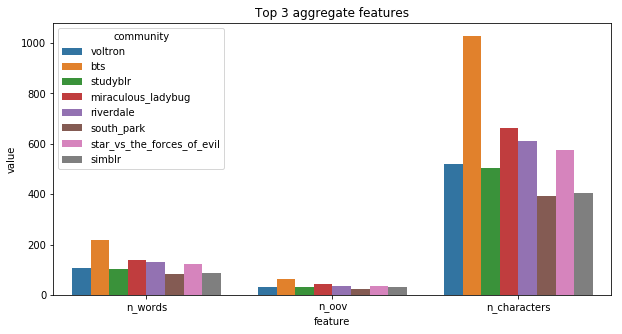

In [55]:
# %matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# Plot
# sns.barplot(x='feature', hue=avgs.columns[1:-1], data=avgs.iloc[:10])
selected_features = avgs.iloc[:3]['feature'].tolist()
selected_data = feat_values[feat_values['feature'].isin(selected_features)]

plt.figure(figsize=(10,5))
sns.barplot(x='feature', y='value', hue='community', data=selected_data).set_title("Top 3 aggregate features")

Text(0.5, 1.0, 'Top 10 specific features')

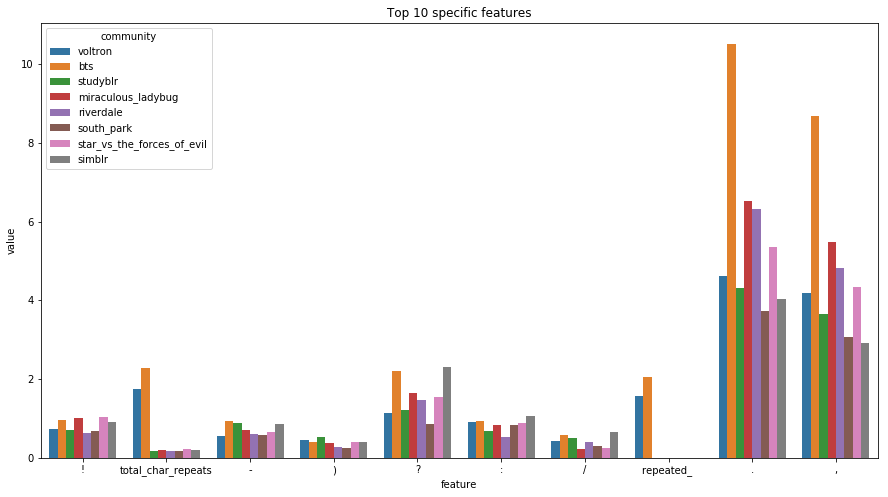

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot
# sns.barplot(x='feature', hue=avgs.columns[1:-1], data=avgs.iloc[:10])
selected_features = avgs.iloc[3:13]['feature'].tolist()
selected_data = feat_values[feat_values['feature'].isin(selected_features)]

plt.figure(figsize=(15,8))
sns.barplot(x='feature', y='value', hue='community', data=selected_data).set_title('Top 10 specific features')